In [10]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
plt.rcParams['image.cmap'] = 'gist_earth'
np.random.seed(98765)

In [5]:
import image_gen_seis
from tf_unet import unet
from tf_unet import util

In [16]:
nx = 1000
ny = 1000


In [17]:
generator = image_gen_seis.GrayScaleDataProvider(nx, ny, cnt=10, yWidth=20, r_max=400)

In [18]:
x_test, y_test = generator(1)

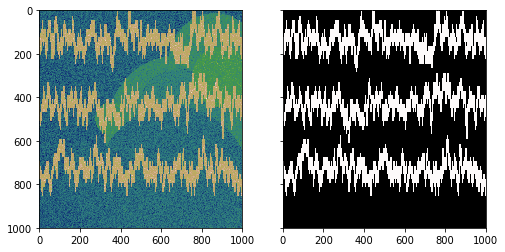

In [19]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")

In [20]:
net = unet.Unet(channels=generator.channels, n_class=generator.n_class, layers=3, features_root=16)

2018-11-15 19:33:52,428 Layers 3, features 16, filter size 3x3, pool size: 2x2


In [21]:
trainer = unet.Trainer(net, optimizer="momentum", opt_kwargs=dict(momentum=0.2))

In [22]:
path = trainer.train(generator, "./unet_trained", training_iters=32, epochs=10, display_step=2)

2018-11-15 19:34:00,054 Removing '/Users/bdel/Research/digitSeis/machine_learning_DigitSeis/image_seg_scripts/prediction'
2018-11-15 19:34:00,057 Removing '/Users/bdel/Research/digitSeis/machine_learning_DigitSeis/image_seg_scripts/unet_trained'
2018-11-15 19:34:00,059 Allocating '/Users/bdel/Research/digitSeis/machine_learning_DigitSeis/image_seg_scripts/prediction'
2018-11-15 19:34:00,060 Allocating '/Users/bdel/Research/digitSeis/machine_learning_DigitSeis/image_seg_scripts/unet_trained'
2018-11-15 19:34:36,257 Verification error= 34.8%, loss= 0.6926
2018-11-15 19:34:38,309 Start optimization
2018-11-15 19:35:00,957 Iter 0, Minibatch Loss= 0.6629, Training Accuracy= 0.7204, Minibatch error= 28.0%
2018-11-15 19:35:44,245 Iter 2, Minibatch Loss= 0.6322, Training Accuracy= 0.7218, Minibatch error= 27.8%
2018-11-15 19:36:22,240 Iter 4, Minibatch Loss= 0.6162, Training Accuracy= 0.7196, Minibatch error= 28.0%
2018-11-15 19:36:59,558 Iter 6, Minibatch Loss= 0.6142, Training Accuracy= 0.71

2018-11-15 20:19:14,732 Iter 128, Minibatch Loss= 0.6929, Training Accuracy= 0.3665, Minibatch error= 63.4%
2018-11-15 20:19:54,212 Iter 130, Minibatch Loss= 0.6929, Training Accuracy= 0.7581, Minibatch error= 24.2%
2018-11-15 20:20:31,874 Iter 132, Minibatch Loss= 0.6929, Training Accuracy= 0.5777, Minibatch error= 42.2%
2018-11-15 20:21:12,440 Iter 134, Minibatch Loss= 0.6929, Training Accuracy= 0.5220, Minibatch error= 47.8%
2018-11-15 20:21:53,111 Iter 136, Minibatch Loss= 0.6929, Training Accuracy= 0.7717, Minibatch error= 22.8%
2018-11-15 20:22:32,565 Iter 138, Minibatch Loss= 0.6929, Training Accuracy= 0.7150, Minibatch error= 28.5%
2018-11-15 20:23:12,199 Iter 140, Minibatch Loss= 0.6929, Training Accuracy= 0.7194, Minibatch error= 28.1%
2018-11-15 20:23:53,003 Iter 142, Minibatch Loss= 0.6929, Training Accuracy= 0.7146, Minibatch error= 28.5%
2018-11-15 20:24:33,970 Iter 144, Minibatch Loss= 0.6929, Training Accuracy= 0.5741, Minibatch error= 42.6%
2018-11-15 20:25:13,391 Iter

2018-11-15 21:07:01,100 Iter 270, Minibatch Loss= 0.6929, Training Accuracy= 0.7111, Minibatch error= 28.9%
2018-11-15 21:07:38,743 Iter 272, Minibatch Loss= 0.6929, Training Accuracy= 0.7182, Minibatch error= 28.2%
2018-11-15 21:08:16,303 Iter 274, Minibatch Loss= 0.6929, Training Accuracy= 0.7028, Minibatch error= 29.7%
2018-11-15 21:08:53,771 Iter 276, Minibatch Loss= 0.6929, Training Accuracy= 0.7209, Minibatch error= 27.9%
2018-11-15 21:09:31,210 Iter 278, Minibatch Loss= 0.6929, Training Accuracy= 0.7181, Minibatch error= 28.2%
2018-11-15 21:10:08,553 Iter 280, Minibatch Loss= 0.6929, Training Accuracy= 0.7308, Minibatch error= 26.9%
2018-11-15 21:10:46,466 Iter 282, Minibatch Loss= 0.6929, Training Accuracy= 0.4733, Minibatch error= 52.7%
2018-11-15 21:11:24,008 Iter 284, Minibatch Loss= 0.6929, Training Accuracy= 0.7181, Minibatch error= 28.2%
2018-11-15 21:12:02,502 Iter 286, Minibatch Loss= 0.6929, Training Accuracy= 0.7490, Minibatch error= 25.1%
2018-11-15 21:12:18,879 Epoc

In [38]:
x_test, y_test = generator(1)

prediction = net.predict("./unet_trained/model.ckpt", x_test)

INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2018-11-16 10:48:23,751 Restoring parameters from ./unet_trained/model.ckpt
2018-11-16 10:48:23,856 Model restored from file: ./unet_trained/model.ckpt


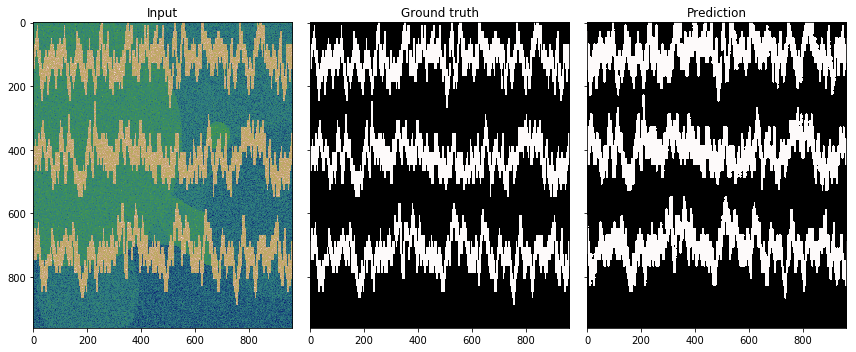

In [39]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")
mask = prediction[0,...,1] > 0.4
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()
plt.savefig('Test_results.png')

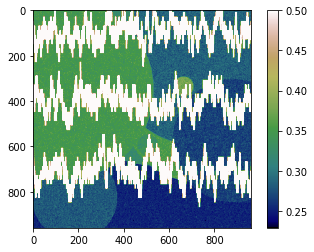

In [40]:

plt.imshow(prediction[0,:,:,1])
plt.colorbar()


array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [ ]:
x_test, y_test = generator(10)


In [ ]:
x_test.shape


In [ ]:
y_test.shape

In [ ]:
x_test[0].shape

In [ ]:
test = "abcdefghijklmnopqrstuvwxyz"

In [ ]:
test[-1]